In [1]:
from ROOT import TFile,TTree,TH1F,gStyle,TLatex,TCanvas,TGraphErrors,TLegend,TH2F,TLine,TGraph,gPad
import numpy as np

Welcome to JupyROOT 6.26/00


# Purpose
Compare the Physics Signal (Coherent J/Psi photoproduction off Deuterium @ SoLID) to the Background (Coherent BH production off Deuterium @ SoLID)

Tags:
    (...)\_phy --> Physics Signal Parameter
    (...)\_bh  --> BH Background Parameter

# Common Variables

In [2]:
beamE=8.8
days=50
lumi = 1.2e37 * 0.5 * 1.0e-24 * 1.0e-9 * 3600.0 * 24 * days
target_type="d"
print("Luminosity =", lumi/3600.0/24/50,"(events/nb/s)")
print("Integrated Luminosity =",lumi,"(events/nb)")

Luminosity = 5999.999999999999 (events/nb/s)
Integrated Luminosity = 25919999999.999992 (events/nb)


# Eventgen specific Variables

In [3]:
n_phy = int(1e6)
n_bh  = int(5e6)

f_phy = TFile("data/test_py_beamE_{:.2f}_evts_{}_process_photo_batch_0.root".format(beamE,n_phy),"READ")
f_bh  = TFile("../fixedTargetBH/fixedTargetBH/data/test_py_e{}_beamE_8.80_evts_{}.root".format(target_type,n_bh),"READ")

t_phy = f_phy.Get("tree")
t_bh  = f_bh.Get("tree")

In [4]:
print("\nJ/Psi photoproduction TTree")
print("---------------------------\n\n")
t_phy.Print("toponly")


J/Psi photoproduction TTree
---------------------------


******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :   999997 : Total =       176165692 bytes  File  Size =  103057230 *
*        :          : Tree compression factor =   1.71                       *
******************************************************************************
branch: weight                 7558366

branch: weight_dsdt_tmin_tmax   7552618

branch: acc_ePlus               845267

branch: acc_eMinus              845795

branch: acc_eOut                 43076

branch: acc_dOut                975593

branch: acc_electro              43304

branch: acc_photo               421770

branch: gammaE                 7405752

branch: t                      7608109

branch: p_ePlus                7634740

branch: p_eMinus               7634870

branch: p_eOut                 7575524

branch: p_vm             

In [5]:
print("\nBH background TTree")
print("---------------------------\n\n")
t_bh.Print("toponly")


BH background TTree
---------------------------


******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :  4525105 : Total =      2552535144 bytes  File  Size =  958881007 *
*        :          : Tree compression factor =   2.66                       *
******************************************************************************
branch: ePlus                158907085

branch: eMinus               158911038

branch: hOut                 158460837

branch: smear_ePlus           76852312

branch: smear_eMinus          76892031

branch: smear_hOut            84878595

branch: q                     56704388

branch: weight                34698797

branch: psf                   32144437

branch: flux                    204692

branch: acc_ePlus              3756484

branch: acc_eMinus             3755497

branch: acc_hOut               4139325

branch: acc_photo              103

# Plotting format

In [6]:
gStyle.SetOptStat(0)
gStyle.SetHistLineWidth(2)
gStyle.SetTitleXSize(0.045)
gStyle.SetTitleYSize(0.045)
gStyle.SetTitleYOffset(1)
gStyle.SetPalette(55)
gStyle.SetNumberContours(50)

latex=TLatex()
latex.SetTextSize(0.03)

c=TCanvas("c","c",800,600)

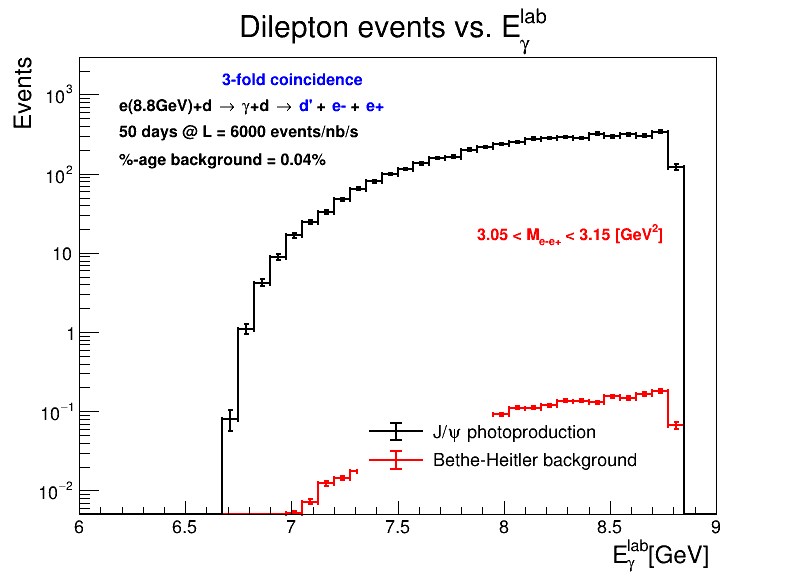

In [7]:
minE,maxE,stepE=6,9,40
binE=(maxE-minE)/stepE*1000
h1 = TH1F("h1","Dilepton events vs. E^{lab}_{#gamma} ;E^{lab}_{#gamma}[GeV] ;"+"Events",stepE,minE,maxE)
h2 = TH1F("h2","Dilepton events vs. E^{lab}_{#gamma} ;E^{lab}_{#gamma}[GeV] ;"+"Events",stepE,minE,maxE)
h3 = TH1F("h3","".format(binE),stepE,minE,maxE)
#t_bh.Draw("gammaE>>h1","(sqrt(Mll2)>2.9&&sqrt(Mll2)<3.3)*acc_photo*weight*flux*psf*{}/{}".format(lumi,n_bh),"goff")
t_bh.Draw("gammaE>>h2","(sqrt(Mll2)>3.0&&sqrt(Mll2)<3.2)*acc_photo*weight*flux*psf*{}/{}".format(lumi,n_bh),"goff")
t_phy.Draw("gammaE>>h3","acc_dOut*acc_ePlus*acc_eMinus*weight*{}/{}".format(lumi,n_phy),"goff")
h2.GetYaxis().SetRangeUser(0.005,3000)
h1.SetLineColor(1)
h2.SetLineColor(2)
h3.SetLineColor(1)
#h1.Draw("hist E1")
h2.Draw("hist E1")
h3.Draw("same hist E1")
c.SetLogy(1)

latex.DrawLatexNDC(.28,.85,"#color[4]{3-fold coincidence}")
latex.DrawLatexNDC(.15,.805,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(beamE)+"#color[4]{d'} + #color[4]{e-} + #color[4]{e+}")
latex.DrawLatexNDC(.15,.76,"{} days @ L = 6000 events/".format(days)+"nb/s")
latex.DrawLatexNDC(.15,.71,"%-age background = "+str(np.round(100*h2.Integral()/h3.Integral(),2))+"%")
latex.DrawLatexNDC(.6,.58,"#color[2]{3.05 < M_{e-e+} < 3.15 [GeV^{2}]}")
legend=TLegend(0.45,0.17,0.83,0.27)
legend.SetBorderSize(0)
legend.AddEntry(h3,"J/#psi photoproduction","le")
legend.AddEntry(h2,"Bethe-Heitler background","le")
legend.Draw("same")
c.Draw()

0.0004535430623515558
0.9864551713640676
2.0978770181536674 4625.529949188232


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5 (Potential memory leak).


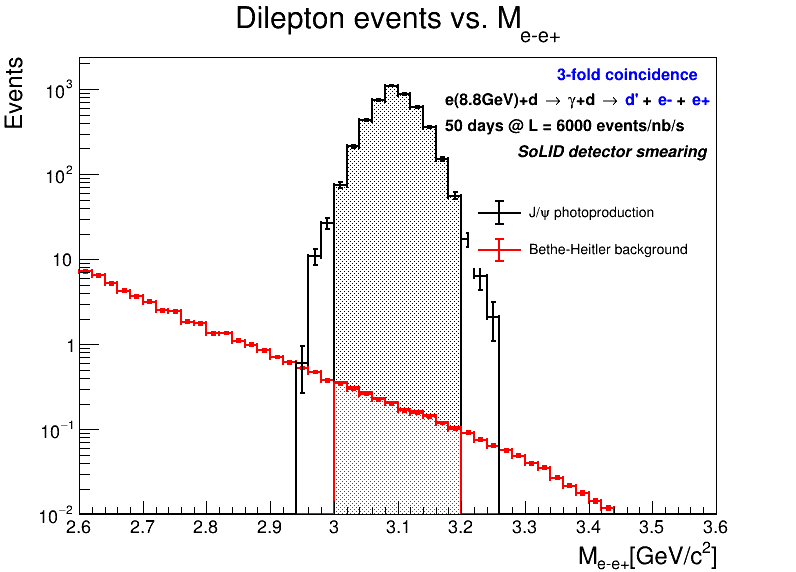

In [12]:
xmin,xmax,xstep=2.6,3.6,50
x2min,x2max=3,3.2
h1=TH1F("h1",";M_{e-e+}[GeV/c^{2}];"+"Events",xstep,xmin,xmax)
x2step=h1.FindBin(x2max)-h1.FindBin(x2min)
h2=TH1F("h2","Dilepton events vs. M_{e-e+};M_{e-e+}[GeV/c^{2}];"+"Events",xstep,xmin,xmax)
h3=TH1F("h3",";M_{e-e+}[GeV/c^{2}];"+"Events",xstep,xmin,xmax)
h4=TH1F("h4",";M_{e-e+}[GeV/c^{2}];"+"Events",xstep,xmin,xmax)
h5=TH1F("h5",";M_{e-e+}[GeV/c^{2}];"+"Events",xstep,xmin,xmax)
smear_m_vm_str="sqrt(2*smear_ePlus.Pt()*smear_eMinus.Pt()*(cosh(smear_ePlus.Eta()-smear_eMinus.Eta())-cos(smear_ePlus.Phi()-smear_eMinus.Phi())))"
t_bh.Draw("sqrt(Mll2_smear)>>h1","weight*psf*flux*{}/{}".format(lumi,n_bh),"goff")
t_bh.Draw("sqrt(Mll2_smear)>>h2","acc_hOut*acc_photo*weight*psf*flux*{}/{}".format(lumi,n_bh),"goff")
t_bh.Draw("sqrt(Mll2_smear)>>h3","(abs(sqrt(Mll2_smear)-3.1)<0.1)*acc_photo*weight*psf*flux*{}/{}".format(lumi,n_bh),"goff")
t_phy.Draw("smear_m_vm>>h4","acc_dOut*acc_ePlus*acc_eMinus*weight*{}/{}".format(lumi,n_phy),"goff")
t_phy.Draw("smear_m_vm>>h5","(abs(smear_m_vm-3.1)<0.1)*acc_dOut*acc_ePlus*acc_eMinus*weight*{}/{}".format(lumi,n_phy),"goff")
h1.SetLineColor(1)
h2.SetLineColor(2)
h3.SetLineColor(2)
h3.SetFillColor(2)
h4.SetLineColor(1)
h5.SetFillColor(1)
h5.SetLineColor(1)
h3.SetFillStyle(3003)
h5.SetFillStyle(3003)
h2.GetYaxis().SetRangeUser(0.01,2400)
h2.GetYaxis().SetTitleOffset(1.15)
#h1.Draw("goff")
h2.Draw("hist E1")
h5.Draw("hist same")
h3.Draw("hist same")
h4.Draw("hist E1 same")
c.SetLogy(0)
gStyle.SetPadGridY(1)
gPad.RedrawAxis()
print(h3.Integral()/h5.Integral())
print(h5.Integral()/h4.Integral())
print(h3.Integral(),h5.Integral())
latex.DrawLatexNDC(.7,.86,"#color[4]{3-fold coincidence}")
latex.DrawLatexNDC(.56,.815,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(beamE)+"#color[4]{d'} + #color[4]{e-} + #color[4]{e+}")
latex.DrawLatexNDC(.56,.77,"{} days @ L = 6000 events/".format(days)+"nb/s")
latex.DrawLatexNDC(.65,.725,"#it{SoLID detector smearing}")
legend=TLegend(0.59,0.53,0.89,0.66)
legend.SetBorderSize(0)
legend.AddEntry(h4,"J/#psi photoproduction","le")
legend.AddEntry(h2,"Bethe-Heitler background","le")
legend.Draw("same")
c.SetLogy(1)
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


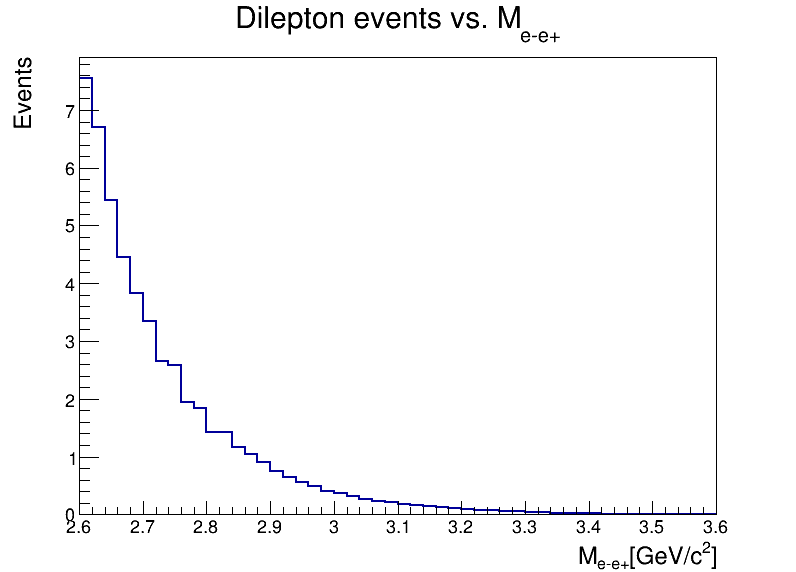

In [9]:
smear_m_vm_str="sqrt(2*smear_ePlus.Pt()*smear_eMinus.Pt()*(cosh(smear_ePlus.Eta()-smear_eMinus.Eta())-cos(smear_ePlus.Phi()-smear_eMinus.Phi())))"
h2=TH1F("h2","Dilepton events vs. M_{e-e+};M_{e-e+}[GeV/c^{2}];"+"Events",xstep,xmin,xmax)
t_bh.Draw("{}>>h2".format(smear_m_vm_str),"acc_photo*weight*psf*flux*{}/{}".format(lumi,n_bh),"hist")
c.Draw()

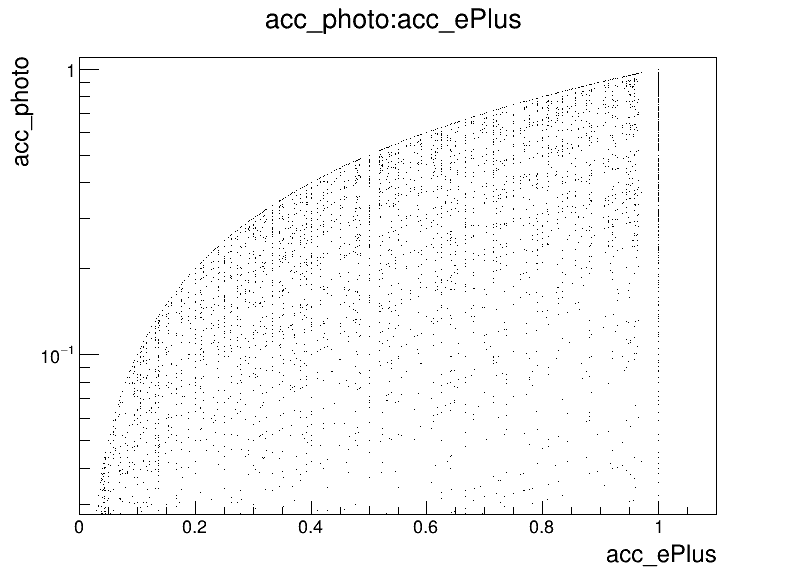